1、实例：用TensorFlow实现XOR

具体步骤如下：
（1）明确输入数据、目标数据
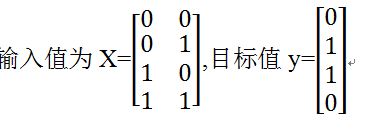
（2）确定网络架构
	网络架构采用图6-27
（3）确定几个函数
	激活函数、代价函数、优化算法等。这里激活函数还是使用ReLU函数，代价函数使用MSE，优化器使用Adam自适应算法。
（4）初始化权重和偏移量等参数
	初始化权重和偏移量，只要随机取些较小值即可，无须考虑一些特殊值，最终这些权重值或偏移量，在循环迭代中不断更新。随机生成权重初始化数据，生成的数据符合正态分布。
（5）循环迭代
	循环迭代过程中参数会自动更新
（6）最后打印输出
	以下我们用TensorFlow来实现XOR问题的详细代码，为尽量避免循环，这里采用矩阵思维，这样可以大大提升性能，尤其在深度学习环境中。如果你对TensorFlow还不是很熟悉，可以先跳过，或先看一下第9章


In [1]:
import tensorflow as tf
import numpy as np

#定义输入与目标值
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

#定义占位符，从输入或目标中按行取数据
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
#初始化权重，使权重满足正态分布
#w1是输入层到隐含层间的权重矩阵，w2是隐含层到输出层的权重
w1 = tf.Variable(tf.random_normal([2,2]))
w2 = tf.Variable(tf.random_normal([2,1]))
#定义偏移量，b1为隐含层上偏移量，b2是输出层上偏移量。
b1=tf.Variable([0.1,0.1])
b2=tf.Variable(0.1)

#利用激活函数就隐含层的输出值
h=tf.nn.relu(tf.matmul(x,w1)+b1)
#计算输出层的值
out=tf.matmul(h,w2)+b2

#定义代价函数或代价函数
loss = tf.reduce_mean(tf.square(out - y))
#利用Adam自适应优化算法
train = tf.train.AdamOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train, feed_dict={x: X, y: Y})
        loss_ = sess.run(loss, feed_dict={x: X, y: Y})
        if i%200==0 :
            print("step: %d, loss: %.3f"%(i, loss_))
    print("X: %r"%X)
    print("pred: %r"%sess.run(out, feed_dict={x: X}))


step: 0, loss: 0.340
step: 200, loss: 0.250
step: 400, loss: 0.250
step: 600, loss: 0.250
step: 800, loss: 0.250
step: 1000, loss: 0.250
step: 1200, loss: 0.250
step: 1400, loss: 0.250
step: 1600, loss: 0.250
step: 1800, loss: 0.250
X: array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])
pred: array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]], dtype=float32)


2、实例：用keras构建深度学习架构

In [ ]:

#构建模型
model = Sequential()
#往模型中添加一层，神经元个数，激活函数及指明输入数据维度。
model.add(Dense(32, activation='relu', input_dim=784))
#再添加一层，神经元个数及激活函数
model.add(Dense(1, activation='sigmoid'))
#编译模型，指明所用优化器，代价函数及度量方式等
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
#训练模型，指明训练的数据集，循环次数，输出详细程度，批量大小等信息
model.fit(x_train, y_train, epochs=10,verbose=2, batch_size=32,)